<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Проанализируем-данные" data-toc-modified-id="Проанализируем-данные-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проанализируем данные</a></span></li><li><span><a href="#Проверим-гипотезы" data-toc-modified-id="Проверим-гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверим гипотезы</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

В нашем распоряжении данные 500 пользователей оператора сотовой связи «Мегалайн» за 2018 год.Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов с целью понять какой тариф приносит больше денег.


## Изучение данных

Импортируем необходимые библиотеки и проверим что все данные выгружаются без ошибок:

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import numpy as np
pd.set_option('display.max_columns', None)

# calls

In [209]:
calls =  pd.read_csv('/datasets/calls.csv')
display(calls.head(15))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [210]:
display(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

нужно перевести call_date в нужный формат datetime. Так как в компании «Мегалайн» секунды всегда округляются до минут имеет смысл округлить в duration значения в большую сторону. 

# internet

In [211]:
internet =  pd.read_csv('/datasets/internet.csv')
display(internet.head(15))

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [212]:
display(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

обнаружена неизвестная переменная Unnamed: 0, на первый взгляд он идентичен с индексом, проверим это:

In [213]:
(internet['Unnamed: 0'] == internet.index).value_counts()


True    149396
dtype: int64

все 149396 строки совпадают с индексом.нужно перевести session_date в нужный формат datetime

# messages

In [214]:
messages =  pd.read_csv('/datasets/messages.csv')
display(messages.head(15))

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [215]:
display(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

нужно перевести message_date в нужный формат datetime

# tariffs

In [216]:
tariffs =  pd.read_csv('/datasets/tariffs.csv')
display(tariffs.head(15))

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [217]:
display(tariffs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

# users

In [218]:
users =  pd.read_csv('/datasets/users.csv')
display(users.head(15))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [219]:
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

нужно перевести churn_date и reg_date в нужный формат datetime

Так же проверим данные на дубликаты

In [220]:
calls.duplicated().sum()

0

In [221]:
users.duplicated().sum()

0

In [222]:
messages.duplicated().sum()

0

In [223]:
internet.duplicated().sum()

0

tariffs в проверке на дубликаты не нуждается так как в таблице всего две строки. Дубликатов не обнаружено и мы приступим к предобработке данных.

## Предобработка данных

переведем указанные строки в datetime:

In [224]:
calls['call_date']=pd.to_datetime(calls['call_date'],format='%Y-%m-%d')

In [225]:
internet['session_date']=pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

In [226]:
messages['message_date']=pd.to_datetime(messages['message_date'],format='%Y-%m-%d')

In [227]:
users['churn_date']=pd.to_datetime(users['churn_date'],format='%Y-%m-%d')


In [228]:
users['reg_date']=pd.to_datetime(users['reg_date'],format='%Y-%m-%d')

проверим все таблицы на наличие пустых значений

In [229]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [230]:
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [231]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [232]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [233]:
tariffs.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

пустоты обнаружены только в `users['churn_date']`, но это объясняется тем что тариф ещё действовал

и округлим duration в большую сторону:

In [234]:
calls['duration']=calls['duration'].apply(math.ceil)


и проверим что все успешно:

In [235]:
display(calls.head(15))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


duration успешно округлились в большую сторону

In [236]:
display(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


None

рассчитаем количество сделанных звонков и израсходованных минут разговора по месяцам. Для этого нам понадобится выделить месяц в таблице calls:

In [237]:
calls['call_month']=pd.DatetimeIndex(calls['call_date']).month

проверим что успешно добавился столец call_month:

In [238]:
calls['call_month'].value_counts()

12    33987
11    29501
10    27146
9     24061
8     21488
7     18298
6     14716
5     12647
4      9272
3      6687
2      3328
1      1476
Name: call_month, dtype: int64

рассчитаем количество сделанных звонков и израсходованных минут для каждого пользователя по месяцам:

In [239]:
calls_month = calls.groupby(['user_id','call_month'])['duration'].agg(['count','sum']).reset_index()
calls_month.columns = ['user_id','month','calls_count', 'calls_duration']
calls_month.head(15)

,user_id,month,calls_count,calls_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


аналогично добавим колонку с месяцем в messages:

In [240]:
messages['message_month']=pd.DatetimeIndex(messages['message_date']).month
messages.head()

,id,message_date,user_id,message_month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


и рассчитаем количество сообщений по месяцем для каждого пользователя

In [241]:
messages_month = messages.groupby(['user_id','message_month'])['user_id'].agg(['count']).reset_index()
messages_month.columns = ['user_id','month','messages_count']
messages_month.head(15)

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [242]:
messages_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         2717 non-null   int64
 1   month           2717 non-null   int64
 2   messages_count  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


аналогично добавим колонку с месяцем в internet:

In [243]:
internet['session_month']=pd.DatetimeIndex(internet['session_date']).month
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,session_month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


и наконец рассчитаем объем израсходованного интернет-трафика по месяцам

In [244]:
sessions_month = internet.groupby(['user_id','session_month'])['mb_used'].agg(['sum']).reset_index()
sessions_month.columns = ['user_id','month','mb_sum']
sessions_month.head()

,user_id,month,mb_sum
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


рассчитаем помесячную выручку с каждого пользователя:

создадим таблицу соединив таблицы calls_month,messages_month,sessions_month. Таким образов у нас будет количество сделанных звонков, израсходованных минут

In [245]:
full = pd.merge(calls_month, messages_month, how='outer', on=['user_id', 'month'])
full = pd.merge(full, sessions_month, how='outer', on=['user_id','month'])
full.head()

,user_id,month,calls_count,calls_duration,messages_count,mb_sum
0,1000,5,22.0,159.0,22.0,2253.49
1,1000,6,43.0,172.0,60.0,23233.77
2,1000,7,47.0,340.0,75.0,14003.64
3,1000,8,52.0,408.0,81.0,14055.93
4,1000,9,58.0,466.0,57.0,14568.91


добавим в таблицу тариф, так  как нам нужно оставить таблицу слева оставим :

In [246]:
full = pd.merge(full, users[['user_id','tariff']], how='left', on=['user_id'])
full.head()

,user_id,month,calls_count,calls_duration,messages_count,mb_sum,tariff
0,1000,5,22.0,159.0,22.0,2253.49,ultra
1,1000,6,43.0,172.0,60.0,23233.77,ultra
2,1000,7,47.0,340.0,75.0,14003.64,ultra
3,1000,8,52.0,408.0,81.0,14055.93,ultra
4,1000,9,58.0,466.0,57.0,14568.91,ultra


добавим так же информацию о городе:

In [247]:
full = full.merge(users[['user_id','city']], how='left', on = 'user_id')
full.head()

,user_id,month,calls_count,calls_duration,messages_count,mb_sum,tariff,city
0,1000,5,22.0,159.0,22.0,2253.49,ultra,Краснодар
1,1000,6,43.0,172.0,60.0,23233.77,ultra,Краснодар
2,1000,7,47.0,340.0,75.0,14003.64,ultra,Краснодар
3,1000,8,52.0,408.0,81.0,14055.93,ultra,Краснодар
4,1000,9,58.0,466.0,57.0,14568.91,ultra,Краснодар


переименуем столбцы чтобы было удобно давить таблицу tariffs:

In [248]:
full.rename(columns = {'tariff' : 'tariff_name'}, inplace = True)

добавим таблицу tariffs:

In [249]:
full=full.merge(tariffs, how='left', on = 'tariff_name')
full.head(20)

,user_id,month,calls_count,calls_duration,messages_count,mb_sum,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1
5,1000,10,57.0,350.0,73.0,14702.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1
6,1000,11,43.0,338.0,58.0,14756.47,ultra,Краснодар,1000,30720,3000,1950,150,1,1
7,1000,12,46.0,333.0,70.0,9817.61,ultra,Краснодар,1000,30720,3000,1950,150,1,1
8,1001,11,59.0,430.0,NaN,18429.34,smart,Москва,50,15360,500,550,200,3,3
9,1001,12,63.0,414.0,NaN,14036.66,smart,Москва,50,15360,500,550,200,3,3


In [250]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   calls_count            3174 non-null   float64
 3   calls_duration         3174 non-null   float64
 4   messages_count         2717 non-null   float64
 5   mb_sum                 3203 non-null   float64
 6   tariff_name            3214 non-null   object 
 7   city                   3214 non-null   object 
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
dtypes: f

In [251]:
full.isna().sum()

user_id                    0
month                      0
calls_count               40
calls_duration            40
messages_count           497
mb_sum                    11
tariff_name                0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Напишем функцию которая будет считать помесячную выручку за звонки, взависимости от Тарифа количество минут разговора в месяц, включённых в абонентскую плату равно либо 500, либо 3000. Если количество минут выходит за рамки установленные тарифом каждая минута стоит либо 3 либо 1 рубль.

In [252]:
def monthly_call_revenue(row):
    call_revenue=0  
    call_revenue=row['calls_duration']-row['minutes_included']  
    #если разница между минутами которые использовали и минутами которые включены в абонентскую плату больше нуля то каждая минута умножается на 1 или на 3
    if call_revenue>0:
            return call_revenue*row['rub_per_minute']
    #если больше нуля то стоимость равна 0, стоимость абонентской платы добавим позже
    else:
        call_revenue=0
        return call_revenue
    
    

In [253]:
full['call_revenue'] = full.apply(monthly_call_revenue, axis=1)
full.head(10)

,user_id,month,calls_count,calls_duration,messages_count,mb_sum,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue
0,1000,5,22.0,159.0,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0
1,1000,6,43.0,172.0,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0
2,1000,7,47.0,340.0,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0
3,1000,8,52.0,408.0,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0
4,1000,9,58.0,466.0,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0
5,1000,10,57.0,350.0,73.0,14702.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0
6,1000,11,43.0,338.0,58.0,14756.47,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0
7,1000,12,46.0,333.0,70.0,9817.61,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0
8,1001,11,59.0,430.0,NaN,18429.34,smart,Москва,50,15360,500,550,200,3,3,0.0
9,1001,12,63.0,414.0,NaN,14036.66,smart,Москва,50,15360,500,550,200,3,3,0.0


In [254]:
(full['call_revenue']).value_counts()

0.0       2460
96.0         9
45.0         7
183.0        7
132.0        7
          ... 
1083.0       1
423.0        1
1215.0       1
1362.0       1
414.0        1
Name: call_revenue, Length: 291, dtype: int64

теперь аналогично рассчитаем функцию для помесячной выручки за сообщения

In [255]:
def monthly_message_revenue(row):
    message_revenue=0
    message_revenue=row['messages_count']-row['messages_included']
    if message_revenue>0: 
                 return message_revenue*row['rub_per_message']
    #если больше нуля то стоимость равна 0, стоимость абонентской платы добавим позже
    else:
        message_revenue=0
        return message_revenue

In [256]:
full['message_revenue'] = full.apply(monthly_message_revenue, axis=1)
full.head(15)

,user_id,month,calls_count,calls_duration,messages_count,mb_sum,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue,message_revenue
0,1000,5,22.0,159.0,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
1,1000,6,43.0,172.0,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
2,1000,7,47.0,340.0,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
3,1000,8,52.0,408.0,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
4,1000,9,58.0,466.0,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
5,1000,10,57.0,350.0,73.0,14702.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
6,1000,11,43.0,338.0,58.0,14756.47,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
7,1000,12,46.0,333.0,70.0,9817.61,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
8,1001,11,59.0,430.0,NaN,18429.34,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0
9,1001,12,63.0,414.0,NaN,14036.66,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0


в «Мегалайн» общая сумма за месяц для веб-трафика округляется в бо́льшую сторону:

In [257]:
#пустоты в mb_sum означают что человек в этом месяце не пользовался интернетом, заменим пустые значения на 0 
full['mb_sum'] = full['mb_sum'].fillna(0)
full['mb_sum'] = full['mb_sum'].apply(math.ceil)
full.head(10)

,user_id,month,calls_count,calls_duration,messages_count,mb_sum,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue,message_revenue
0,1000,5,22.0,159.0,22.0,2254,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
1,1000,6,43.0,172.0,60.0,23234,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
2,1000,7,47.0,340.0,75.0,14004,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
3,1000,8,52.0,408.0,81.0,14056,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
4,1000,9,58.0,466.0,57.0,14569,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
5,1000,10,57.0,350.0,73.0,14703,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
6,1000,11,43.0,338.0,58.0,14757,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
7,1000,12,46.0,333.0,70.0,9818,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0
8,1001,11,59.0,430.0,NaN,18430,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0
9,1001,12,63.0,414.0,NaN,14037,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0


и теперь посчитаем помесячную выручки за интернет

In [258]:
def monthly_internet_revenue(row):
    internet_revenue=0 
    internet_revenue=row['mb_sum']-row['mb_per_month_included']
 #переводим мегабайты в гигабайты и считаем сколько человек заплатил сверх тарифного пакета
    if internet_revenue>0: 
                 return math.ceil(internet_revenue/1024)*row['rub_per_gb']
    #если больше нуля то стоимость равна 0, стоимость абонентской платы добавим позже
    else:
        internet_revenue=0
        return internet_revenue

In [259]:
full['internet_revenue'] = full.apply(monthly_internet_revenue, axis=1)
full.head(15)

,user_id,month,calls_count,calls_duration,messages_count,mb_sum,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue,message_revenue,internet_revenue
0,1000,5,22.0,159.0,22.0,2254,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0
1,1000,6,43.0,172.0,60.0,23234,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0
2,1000,7,47.0,340.0,75.0,14004,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0
3,1000,8,52.0,408.0,81.0,14056,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0
4,1000,9,58.0,466.0,57.0,14569,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0
5,1000,10,57.0,350.0,73.0,14703,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0
6,1000,11,43.0,338.0,58.0,14757,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0
7,1000,12,46.0,333.0,70.0,9818,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0
8,1001,11,59.0,430.0,NaN,18430,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0,600
9,1001,12,63.0,414.0,NaN,14037,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0,0


осталось посчитать помесячную выручку с каждого пользователя сложив показатели по выручке за звонки, сообщения и интернет и добавив абонентскую плату согласно тарифу:

In [260]:
def monthly_total_revenue(row):
    total_revenue=row['call_revenue']+row['message_revenue']+row['internet_revenue']+row['rub_monthly_fee']
    return total_revenue

In [261]:
full['total_revenue'] = full.apply(monthly_total_revenue, axis=1)
full.head(20)

,user_id,month,calls_count,calls_duration,messages_count,mb_sum,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue,message_revenue,internet_revenue,total_revenue
0,1000,5,22.0,159.0,22.0,2254,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0,1950.0
1,1000,6,43.0,172.0,60.0,23234,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0,1950.0
2,1000,7,47.0,340.0,75.0,14004,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0,1950.0
3,1000,8,52.0,408.0,81.0,14056,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0,1950.0
4,1000,9,58.0,466.0,57.0,14569,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0,1950.0
5,1000,10,57.0,350.0,73.0,14703,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0,1950.0
6,1000,11,43.0,338.0,58.0,14757,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0,1950.0
7,1000,12,46.0,333.0,70.0,9818,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0,1950.0
8,1001,11,59.0,430.0,NaN,18430,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0,600,1150.0
9,1001,12,63.0,414.0,NaN,14037,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0,0,550.0


In [262]:
full.isna().sum()

user_id                    0
month                      0
calls_count               40
calls_duration            40
messages_count           497
mb_sum                     0
tariff_name                0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
call_revenue               0
message_revenue            0
internet_revenue           0
total_revenue              0
dtype: int64

пустоты означают что человек в этом месяце не пользовался звонками или сообщениями, заменим пустые значения на 0 точно так же как мы ранее заменили пустоты на 0 в переменной mb_sum :

In [263]:
full['calls_count'] = full['calls_count'].fillna(0)
full['calls_duration'] = full['calls_duration'].fillna(0)
full['messages_count'] = full['messages_count'].fillna(0)

и проверим что пустот больше нет

In [264]:
full.isna().sum()

user_id                  0
month                    0
calls_count              0
calls_duration           0
messages_count           0
mb_sum                   0
tariff_name              0
city                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
call_revenue             0
message_revenue          0
internet_revenue         0
total_revenue            0
dtype: int64

## Проанализируем данные

Сначала посмотрим сколько месяцев пользуются тарифами ultra а сколько тарифом smart

In [265]:
full.groupby('tariff_name')['user_id'].count()

tariff_name
smart    2229
ultra     985
Name: user_id, dtype: int64

месяцев в которых пользователись тарифом smart чуть больше чем в 2 раза больше, нужно учесть это при анализе данных

рассчитаем среднее, медиану, дисперсию и стандартное отклонение для минут разговора, количества сообщений и для объёма интернет-трафика:

In [266]:
full.pivot_table(index = 'tariff_name', values = ['calls_duration','messages_count','mb_sum'], aggfunc = ['mean','median','var','std'])

mean                                      median         \
            calls_duration        mb_sum messages_count calls_duration mb_sum   
tariff_name                                                                     
smart           417.934948  16208.873486      33.384029          422.0  16507   
ultra           526.623350  19469.308629      49.363452          518.0  19309   

                                      var                               \
            messages_count calls_duration        mb_sum messages_count   
tariff_name                                                              
smart                 28.0   36219.315784  3.446256e+07     796.812958   
ultra                 38.0  100873.633397  1.017516e+08    2285.266143   

                       std                               
            calls_duration        mb_sum messages_count  
tariff_name                                              
smart           190.313730   5870.482332      28.227876  
ultra           317.606098  10087.197726      47.804457

построим гистограммы для этих переменных:
начнем с продолжительности звонка

Text(0.5, 0, 'продолжительность звонка для тариф ultra')

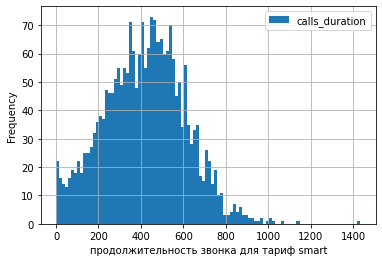

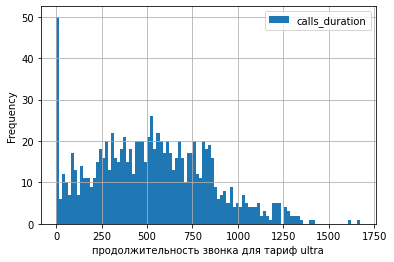

In [267]:
full.query('tariff_name == "smart"').plot(kind='hist',y='calls_duration',bins = 100, grid=True)
plt.xlabel("продолжительность звонка для тариф smart")
full.query('tariff_name == "ultra"').plot(kind='hist',y='calls_duration',bins = 100, grid=True)
plt.xlabel("продолжительность звонка для тариф ultra")

в тарифе ultra гораздо больше людей не разговаривают по телефону вообще, но в среднем пользователи тарифа ultra дольше разговаривают 

Text(0.5, 0, 'количество сообщений для тариф ultra')

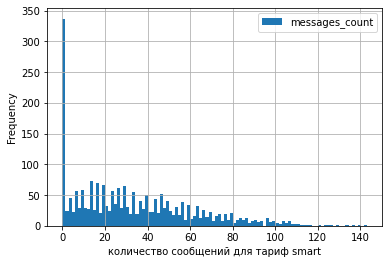

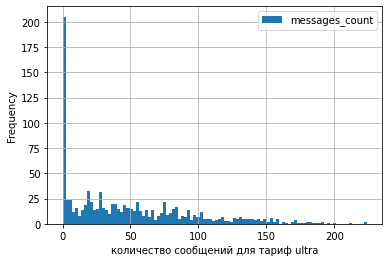

In [268]:
full.query('tariff_name == "smart"').plot(kind='hist',y='messages_count',bins = 100, grid=True)
plt.xlabel("количество сообщений для тариф smart")
full.query('tariff_name == "ultra"').plot(kind='hist',y='messages_count',bins = 100, grid=True)
plt.xlabel("количество сообщений для тариф ultra")

в тарифе ультра меньше людей которые отправили 0 сообщений и в целом наблюдается больше сообщений чем в тарифе smart

Text(0.5, 0, 'объём интернет-трафика  для тариф ultra')

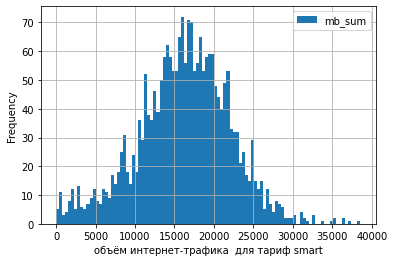

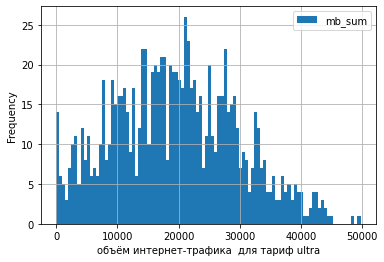

In [269]:
full.query('tariff_name == "smart"').plot(kind='hist',y='mb_sum',bins = 100, grid=True)
plt.xlabel("объём интернет-трафика  для тариф smart")
full.query('tariff_name == "ultra"').plot(kind='hist',y='mb_sum',bins = 100, grid=True)
plt.xlabel("объём интернет-трафика  для тариф ultra")

пользователи тарифа ultra гораздо больше пользуются интеренетом 

посчитаем среднюю выручку для пользователей разных тарифов

In [270]:
full.pivot_table(index = 'tariff_name', values = 'total_revenue', aggfunc = ['mean','median','var','std'])

,mean,median,var,std
,total_revenue,total_revenue,total_revenue,total_revenue
tariff_name,,,,
smart,1289.973531,1023.0,669785.708006,818.404367
ultra,2070.152284,1950.0,141516.745079,376.187114


выводы из анализа гистограмм следующие:

1)в среднем пользователи тарифа ultra пользуются всеми услугами больше

2)разброс показателей гораздо больше для тарифа ultra

3)в обоих тарифах есть люди которые не звонят или не пользуются сообщениями или интернетом

4)распределения представляют собой нормальное распределение, c сильной скошенностью влево по количеству сообщений.



## Проверим гипотезы

проверим гипотезу "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются".
За нулевую гипотезу примем утверждение "средняя выручка пользователей тарифов «Ультра» и «Смарт» равна"
За альтернативную примем "средняя выручка пользователей тарифов «Ультра» и «Смарт» неравна"


критический уровень статистической значимости зададим равным 0.05
так как пользователи тарифа smart и пользователи тарифа ultra независимые генеральные совокупности используем метод scipy.stats.ttest_ind

In [271]:
total_revenue_smart =  full.query('tariff_name == "smart"')['total_revenue']
total_revenue_ultra =  full.query('tariff_name == "ultra"')['total_revenue']

alpha = 0.05 

 
results = st.ttest_ind(
    total_revenue_smart, 
    total_revenue_ultra)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


проверка гипотезы показывает что равенство выручек, полученных с пользователей тарифов «Ультра» и «Смарт» очень маловероятно.

проверим гипотезу "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.":
таким образом нулевая гипотеза будет звучать так "выручка пользователей из Москвы равна выручке пользователей из других городов"

In [272]:
total_revenue_city_moscow_smart =  full.query('city == "Москва"')['total_revenue']
total_revenue_city_other_smart =  full.query('city != "Москва"')['total_revenue']

alpha = 0.05 

results = st.ttest_ind(
    total_revenue_city_moscow_smart, 
    total_revenue_city_other_smart)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


проверка гипотезы показывает что мы не можем отбросить нулевую гипотезу о равенстве выручек пользователей из Москвы и других городов

чтобы ответить на вопрос какой тариф наиболее выгоден построим еще одну таблицу с доходом

In [273]:
full.pivot_table(index = 'tariff_name', values = 'total_revenue', aggfunc = ['mean','median','var','std'])

,mean,median,var,std
,total_revenue,total_revenue,total_revenue,total_revenue
tariff_name,,,,
smart,1289.973531,1023.0,669785.708006,818.404367
ultra,2070.152284,1950.0,141516.745079,376.187114


In [274]:
print ('умножим медианную прибыль на количество месяцев в котором пользовались тарифом smart', 2229*1023)

умножим медианную прибыль на количество месяцев в котором пользовались тарифом smart 2280267


In [275]:
print ('умножим медианную прибыль на количество месяцев в котором пользовались тарифом ultra', 985*1950)

умножим медианную прибыль на количество месяцев в котором пользовались тарифом ultra 1920750


## Общий вывод

Мы изучили данные о 500 пользователях оператора мобильной связи, а именно данные о звонках, сообщениях и использованному интернет-трафику. Приведя данные к нужным типам и округлив минуты и гигабайты в большую сторону мы построили гистограммы по этим параметрам для разных тарифов. Для каждого пользователя посчитали количество сделанных звонков, израсходованных минут, количество отправленных сообщений и помесячную выручку, отдельно для каждого источника прибыли(сообщения, звонки и интернет).  Можно заметить что пользователи тарифа ultra используют больше интернет-трафика, сообщений и чаще разговаривают. Средняя прибыль больше за пользователей ultra примерно на 800 руб. Мы так же отвергли гипотезу о том, что средняя выручка пользователей разных тарифов равна,но можно с высокой долей вероятности утверждать что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Критический уровень статистической значимости был задан равным 0.05.

Пользователи больше пользуются тарифом Smart, средний доход тоже выше у тарифа Smart, таким образом для оператора наиболее выгодным будет тариф Smart

